# Exploratory data analysis on Olympics Games

**Content**

Goal is to explore a dataset on the modern summer and winter Olympic Games, from Athens 1896 to Rio 2016 and try to find hidden patterns, actionable insights from dataset.

1. Year - Year in which event took place
2. City - City where event took place
3. Sport - Sport category
4. Discipline - Discipline category
5. Athlete - Athlete's name
6. Country - Winning Country
7. Gender - Male or Female athelete
8. Event - Sport event
9. Medal - Winning medal Gold,Silver,Bronze

The file athlete_events.csv contains 271116 rows and 15 columns; Each row corresponds to an individual athlete competing in an individual Olympic event. Source of this file : https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results We will be also making use of noc_regions.csv file to rename country names from the same source. GDP data and 2017 world happiness index from https://www.kaggle.com/unsdsn/world-happiness, we can also use these to see any relevant insights.

We will use these 4 datasets as supportive objects.

# Index of Content

1. Importing the modules.
2. Data importing.
3. Collecting information about the two dataset.
4. Joining the dataframes.
5. Genderwise competitive index.
6. Participants and winners in Summer Olympics.
7. Medals per country.
8. Olympic performance variation with Economic progress of nation.
9. Olympics performance variations with its Happiness index.
10. Countrywise participation.
11. Heatmap of yearwise sports.
12. Indians at Olympis
13. Genderwise medals by India
14. Yearwise medals by India
15. Conclusions.

# 1. Importing teh Modules

In [2]:
# For data maipulation 
import numpy as np
import pandas as pd

# For data visualization 
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 2. Importing data to Python environment

In [3]:
# Importing primary data
primary_data = pd.read_csv('summer_olympics.csv')

In [4]:
# Importing supportive data
regions = pd.read_csv('noc_regions.csv')

In [5]:
#Importing supportive data
gdp = pd.read_csv('gdp_data.csv')

In [6]:
#Importing supportive data
happiness = pd.read_csv('2017_happiness.csv')

In [7]:

#Importing supportive data
host = pd.read_csv('olym_host.csv')

In [8]:
#Importing supportive data

athlete_data = pd.read_csv('athlete_events.csv')


In [9]:
#Kindly Wait for below function to show output
athlete_data.head(10)

,Name,Sex,NOC,Year,Season,Sport,Event,Medal
0,A Dijiang,M,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,DEN,1920,Summer,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,NED,1988,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN
5,Christine Jacoba Aaftink,F,NED,1988,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
6,Christine Jacoba Aaftink,F,NED,1992,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN
7,Christine Jacoba Aaftink,F,NED,1992,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
8,Christine Jacoba Aaftink,F,NED,1994,Winter,Speed Skating,Speed Skating Women's 500 metres,NaN
9,Christine Jacoba Aaftink,F,NED,1994,Winter,Speed Skating,"Speed Skating Women's 1,000 metres",NaN


In [10]:
print(primary_data.head(),regions.head(),gdp.head(),happiness.head(),host.head(),athlete_data.head())

   Year    City     Sport Discipline             Athlete Country Gender  \
0  1896  Athens  Aquatics   Swimming       HAJOS, Alfred     HUN    Men   
1  1896  Athens  Aquatics   Swimming    HERSCHMANN, Otto     AUT    Men   
2  1896  Athens  Aquatics   Swimming   DRIVAS, Dimitrios     GRE    Men   
3  1896  Athens  Aquatics   Swimming  MALOKINIS, Ioannis     GRE    Men   
4  1896  Athens  Aquatics   Swimming  CHASAPIS, Spiridon     GRE    Men   

                        Event   Medal  
0              100M Freestyle    Gold  
1              100M Freestyle  Silver  
2  100M Freestyle For Sailors  Bronze  
3  100M Freestyle For Sailors    Gold  
4  100M Freestyle For Sailors  Silver      NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN        Country Code  Year  GDP-Growth  GDP-Per-Capita  GD

# 3. Collecting and refining the informtion

We are going to:

1. Review the Few lines of the data;
2. Use the describe and info functions to collect statistical information, datatypes, column names and other information.
3. Check null values and its impact on analysis. Drop them if necessary.

In [11]:
primary_data.head(5)

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [12]:
primary_data.describe(include = 'all')

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
count,31165.000000,31165,31165,31165,31165,31161,31165,31165,31165
unique,NaN,22,43,67,22762,147,2,666,3
top,NaN,London,Aquatics,Athletics,"PHELPS, Michael",USA,Men,Football,Gold
freq,NaN,3567,4170,3638,22,4585,22746,1497,10486
mean,1970.482785,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,33.158416,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1896.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1948.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
primary_data.Year.unique()

array([1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948,
       1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988, 1992,
       1996, 2000, 2004, 2008, 2012], dtype=int64)

In [14]:
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        31165 non-null  int64 
 1   City        31165 non-null  object
 2   Sport       31165 non-null  object
 3   Discipline  31165 non-null  object
 4   Athlete     31165 non-null  object
 5   Country     31161 non-null  object
 6   Gender      31165 non-null  object
 7   Event       31165 non-null  object
 8   Medal       31165 non-null  object
dtypes: int64(1), object(8)
memory usage: 2.1+ MB


In [15]:
#Defining a disctionary whey Key = Column name, Value = data type in which it needs to be converted
dtype_dict = {"City":"category","Sport":"category","Discipline":"category","Athlete":"category","Discipline":"category","Country":"category","Gender":"category","Event":"category","Medal":"category"}

# Converting data types 
primary_data = primary_data.astype(dtype_dict)
primary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31165 entries, 0 to 31164
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Year        31165 non-null  int64   
 1   City        31165 non-null  category
 2   Sport       31165 non-null  category
 3   Discipline  31165 non-null  category
 4   Athlete     31165 non-null  category
 5   Country     31161 non-null  category
 6   Gender      31165 non-null  category
 7   Event       31165 non-null  category
 8   Medal       31165 non-null  category
dtypes: category(8), int64(1)
memory usage: 1.4 MB


In [16]:
primary_data.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [17]:
primary_data[pd.isnull(primary_data.Country)]

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [18]:
# Dropping the null values
primary_data.dropna(inplace =  True)
primary_data.shape

(31161, 9)

In [19]:
host.head()

,City,Country,NOC,Summer,Winter,Year,Latitude,Longitude
0,Athens,Greece,GRE,I,NaN,1896,37.983333,23.733334
1,Paris,France,FRA,II,NaN,1900,48.853410,2.348800
2,St. Louis,United States,USA,III,NaN,1904,38.627273,-90.197891
3,London,United Kingdom,GBR,IV,NaN,1908,51.508415,-0.125533
4,Stockholm,Sweden,SWE,V,NaN,1912,59.332577,18.064903


In [20]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [21]:
region_temp = regions.copy()
region_temp.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [22]:
#Dropping unnecessary data 
region_temp.drop(columns = 'notes', inplace=True)
region_temp.head()

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [23]:
modified_primary_data = primary_data.copy()
modified_primary_data.rename(columns = {"Country":"NOC"}, inplace = True)

#Modifying primary data 
modified_primary_data = pd.merge(left = modified_primary_data, right=region_temp, on ="NOC", how="left")

modified_primary_data.head()

modified_primary_data.rename(columns = {'region':'Winning Country'}, inplace=True)
modified_primary_data.head()

,Year,City,Sport,Discipline,Athlete,NOC,Gender,Event,Medal,Winning Country
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver,Austria
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze,Greece
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold,Greece
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver,Greece


In [24]:
# Making changes to permanant to primary data 
primary_data = modified_primary_data
primary_data.shape

(31161, 10)

# 5. Competitive index among gender

In [25]:
# Loading dataframe in temporary variable 
winners = primary_data.copy()


#Male winners 
male_winners = winners[winners.Gender == 'Men']
winner_male = male_winners.Year.value_counts().sort_index()
winner_male = pd.DataFrame(winner_male)

#Female winners 
female_winners = winners[winners.Gender == 'Women']
winner_female = female_winners.Year.value_counts().sort_index()
winner_female = pd.DataFrame(winner_female)

#Resetting Indices
winner_male.reset_index(level=0, inplace = True)
winner_female.reset_index(level=0, inplace = True)


#Renaming column headings for merging purpose
winner_male.rename(columns = {"index":"Year", "Year":"Male Winners"}, inplace=True)
winner_female.rename(columns = {"index":"Year", "Year":"Female Winners"}, inplace=True)


#Merging both data
all_winners_stats = pd.merge(left = winner_male, right = winner_female, how= "left", on="Year")
all_winners_stats.set_index("Year", inplace=True)
all_winners_stats.head()

,Male Winners,Female Winners
Year,,
1896,151,NaN
1900,501,11.0
1904,458,12.0
1908,789,15.0
1912,855,30.0


In [26]:
#Loading CSV into DataFrame object
participants = athlete_data
# participants.head()
#Extracting part of DataFrame by Sex(column) and sorted in ascending order by Year
#Male participants
male_participants = participants[participants.Sex == "M"]
participants_male = male_participants.Year.value_counts().sort_index()
participants_male = pd.DataFrame(participants_male)

#Female Participants
female_participants = participants[participants.Sex == "F"]
participants_female = female_participants.Year.value_counts().sort_index()
participants_female = pd.DataFrame(participants_female)

#Resetting indices
participants_male.reset_index(level=0, inplace=True)
participants_female.reset_index(level=0, inplace=True)

#Renaming column headings for merging dataframes
participants_male.rename(columns = {"index":"Year", "Year":"Male Participants"}, inplace=True)
participants_female.rename(columns = {"index":"Year", "Year":"Female Participants"}, inplace=True)

#Joining the data
all_participants_stats = pd.merge(left = participants_male, right= participants_female, how= 'left', on = 'Year')
all_participants_stats.head()

,Year,Male Participants,Female Participants
0,1896,380,NaN
1,1900,1903,33.0
2,1904,1285,16.0
3,1906,1722,11.0
4,1908,3054,47.0


In [27]:
# Merging all winner stats and participants stats together
all_stats = pd.merge(left = all_winners_stats, right=all_participants_stats, how='left', on='Year')
all_stats.head()

,Year,Male Winners,Female Winners,Male Participants,Female Participants
0,1896,151,NaN,380,NaN
1,1900,501,11.0,1903,33.0
2,1904,458,12.0,1285,16.0
3,1908,789,15.0,3054,47.0
4,1912,855,30.0,3953,87.0


In [28]:
#Male competition index
all_stats["Male Competition Index"] = all_stats["Male Winners"]/all_stats["Male Participants"]

#Female competition index
all_stats["Female Competition Index"] = all_stats["Female Winners"]/all_stats["Female Participants"]

#Overall competiton index
all_stats["Overall Competiton Index"] = (all_stats["Male Winners"]+all_stats["Female Winners"])/(all_stats["Male Participants"]+all_stats["Female Participants"])


all_stats.head()

,Year,Male Winners,Female Winners,Male Participants,Female Participants,Male Competition Index,Female Competition Index,Overall Competiton Index
0,1896,151,NaN,380,NaN,0.397368,NaN,NaN
1,1900,501,11.0,1903,33.0,0.263269,0.333333,0.264463
2,1904,458,12.0,1285,16.0,0.356420,0.750000,0.361261
3,1908,789,15.0,3054,47.0,0.258350,0.319149,0.259271
4,1912,855,30.0,3953,87.0,0.216291,0.344828,0.219059


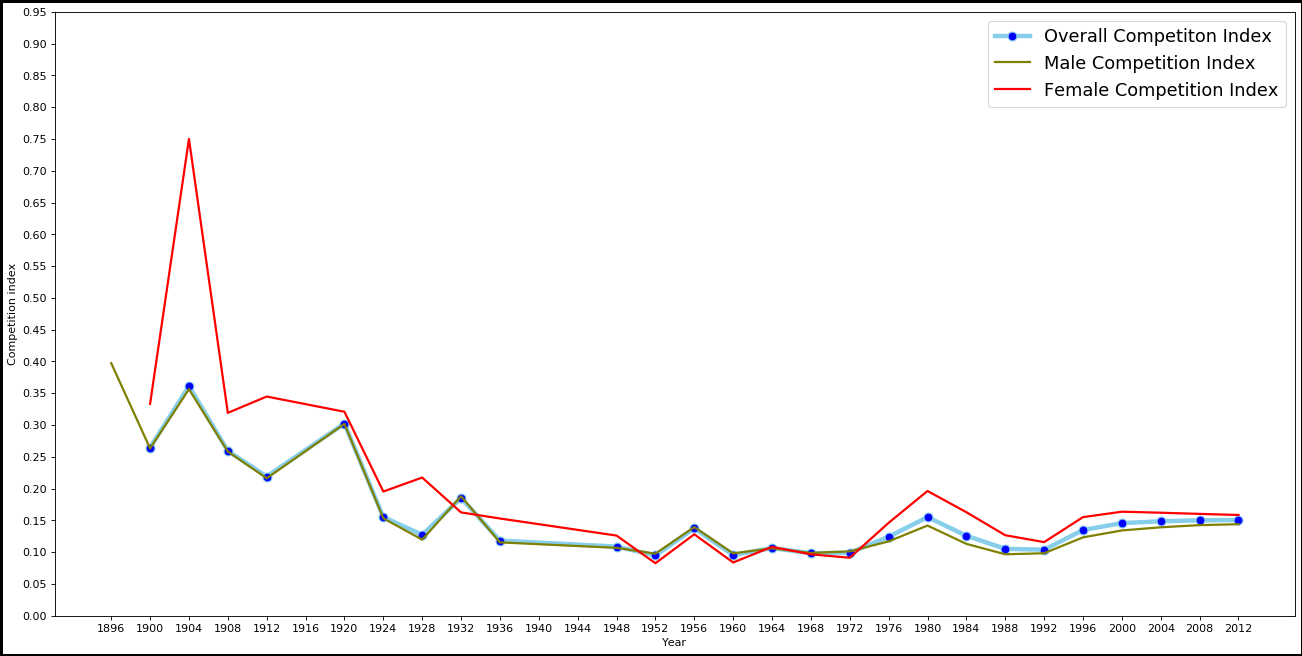

In [51]:
#Defining size, background color, edge color, resolution of the plot
line_graph = plt.figure(num=None, figsize=(20,10), dpi=80, facecolor='w', edgecolor='black', linewidth=3)

#Plotting X axis as Year and Y axis as competition indices
plt.plot('Year', 'Overall Competiton Index', data=all_stats, marker='o', markerfacecolor='blue', markersize=8, color='skyblue', linewidth=4)
plt.plot('Year', 'Male Competition Index', data=all_stats, marker='', color='olive', linewidth=2)
plt.plot('Year', 'Female Competition Index', data=all_stats, marker='', color='red', linewidth=2)

#Defining scale on X and Y axes
plt.xticks(np.arange(1896, 2015, 4))
plt.yticks(np.arange(0, 1, 0.05))

#Fine tuning legends and axis labels
plt.legend(prop={'size':16})
plt.xlabel("Year")
plt.ylabel("Competition index")
plt.show()

#Saving generated plot as JPG image
#line_graph.savefig('test.jpg')

Lesser the value of competition index simply means more individuals are participating, which also means increased competition.

From the plot above, we can observe that competition index for men and overall index trend is going hand in hand. But for Females, it is quite cluttery

This trend was affected by number of factors. World war I and II for instance in 1910 and 1940 respectively.

For females born in countries that has to abide by cultural rules, might not get any chance to participate in the olympics. 

The trend have had its ups and downs. A single global economical, political or even geographical event can produce butterfly effects on unimaginable scales at International Olympics levels. It is so chaotic that we can never predict its future state properly.

What can be the reason for increasing competition levels ? Rapid growth of human population in 20th century is definetely one of the reason. Rapid economic, growth in technology can also be one of the reasons.

Let us analyze more data to come to the proper conclusion.

# 6. Participants and winner in Olympics

In [36]:
#Extracting only Male winners
male_olympics = primary_data[primary_data.Gender == 'Men']
# male_olympics.head()

#Extracting only female winners
female_olympics = primary_data[primary_data.Gender == 'Women']
# female_olympics.head()

,Year,City,Sport,Discipline,Athlete,NOC,Gender,Event,Medal,Winning Country
416,1900,Paris,Golf,Golf,"PRATT, Daria",USA,Women,Individual,Bronze,USA
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold,USA
418,1900,Paris,Golf,Golf,"WHITTIER, Pauline",USA,Women,Individual,Silver,USA
639,1900,Paris,Tennis,Tennis,"JONES, Marion",ZZX,Women,Mixed Doubles,Bronze,NaN
640,1900,Paris,Tennis,Tennis,"ROSENBAUM, Hedwig",ZZX,Women,Mixed Doubles,Bronze,NaN


In [49]:
#Extract the seasons
seasons = athlete_data['Season'].unique()
#seasons

#Extracting only Male participants
male_in_olympics_summer = athlete_data[(athlete_data.Sex == 'M')  &  (athlete_data.Season == 'Summer')]
male_in_olympics_winter = athlete_data[(athlete_data.Sex == 'M')  &  (athlete_data.Season == 'Winter')]

# male_in_olympics_summer.head()
# male_in_olympics_winter.head()

#Extracting only Female Participants
female_in_olympics_summer = athlete_data[(athlete_data.Sex == 'F')  &  (athlete_data.Season == 'Summer')]
female_in_olympics_winter = athlete_data[(athlete_data.Sex == 'F')  &  (athlete_data.Season == 'Winter')]

# female_in_olympics_summer.head()
# female_in_olympics_winter.head()



,Name,Sex,NOC,Year,Season,Sport,Event,Medal
0,A Dijiang,M,CHN,1992,Summer,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,CHN,2012,Summer,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,DEN,1920,Summer,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,DEN,1900,Summer,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
29,"Einar Ferdinand ""Einari"" Aalto",M,FIN,1952,Summer,Swimming,Swimming Men's 400 metres Freestyle,NaN


Text(0.0, 1.0, 'Male winners per olympics edition')

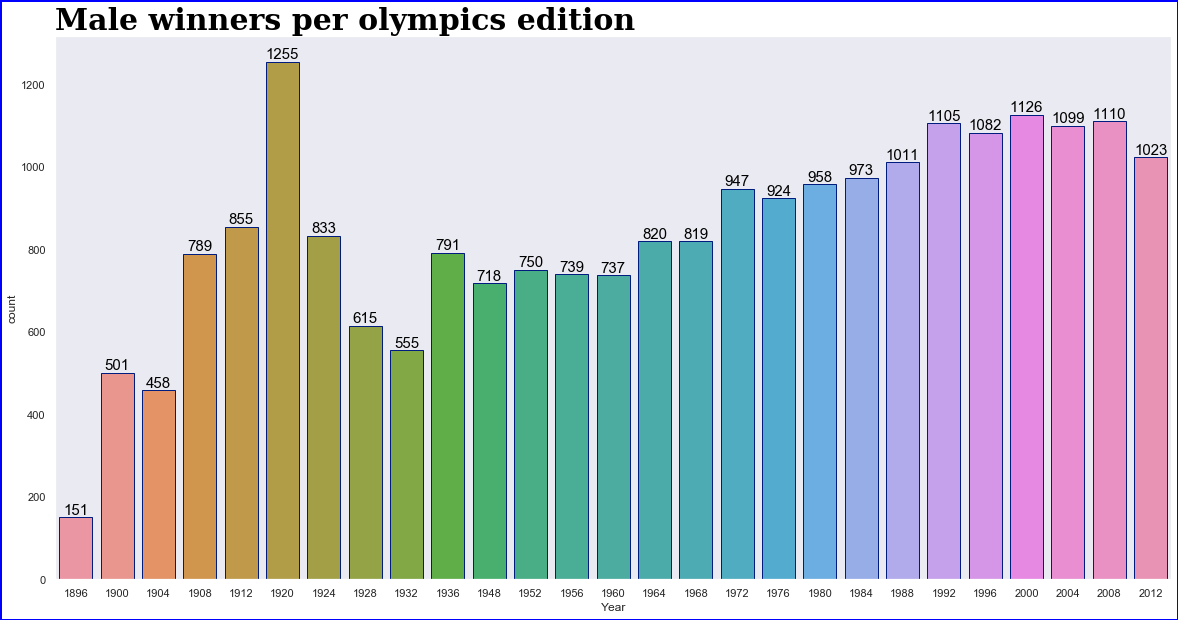

In [56]:
#Setting background styles 
sns.set(style='dark')


#Setting plot size and edgecolors
plt.figure(figsize=(20,10), edgecolor='blue', linewidth=3)

#Creating plot
male_winners = sns.countplot(x='Year', data=male_olympics, edgecolor=sns.color_palette("dark", 1))


#Adding value labels to plot 
for patch in male_winners.patches:
    male_winners.text(patch.get_x() + patch.get_width()/2., patch.get_height(), '%d' % int(patch.get_height()),
                      fontsize = 15, color = 'black', ha='center', va='bottom')
    
#manipulating title visuals
titlefont = {'family': 'serif', 'color': 'black', 'weight': 'bold', 'size': 30}
plt.title('Male winners per olympics edition', fontdict = titlefont, loc='left')
